# **Filtering a signal using the DFT**

Filtering a signal using the DFT involves the following steps:

i. Compute the DFT of the input signal using the np.fft.fft function.

ii. Multiply the DFT of the input signal with the frequency response of the desired filter.

iii. Compute the inverse DFT of the resulting product using the np.fft.ifft function to obtain the filtered signal.

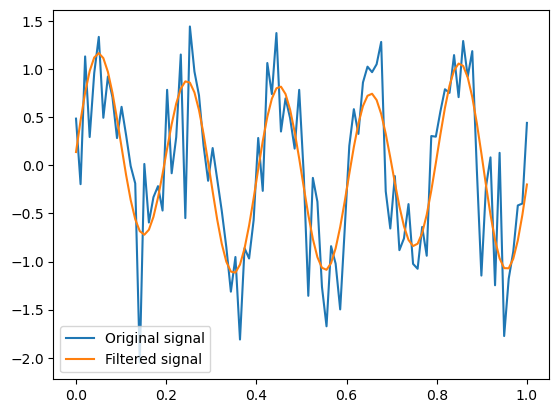

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create a noisy signal
t = np.linspace(0, 1, 100)
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(len(t))

# Compute the DFT using numpy.fft.fft
dft=np.fft.fft(signal)

# Create a filter
freqs = np.fft.fftfreq(len(signal), t[1]-t[0])
filter = (np.abs(freqs)<5)

# Apply the filter
dft_filtered = dft * filter

# Compute the filtered signal using numpy.fft.ifft
signal_filtered = np.fft.ifft(dft_filtered)

# Plot the original and filtered signals
plt.plot(t, signal, label='Original signal')
plt.plot(t, signal_filtered, label='Filtered signal')
plt.legend()
plt.show()

**Create a noisy signal**
```
t = np.linspace(0, 1, 100)
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(len(t))
```
This code creates a noisy signal that is a sum of a sine wave with frequency 5 Hz and Gaussian noise. Here is an explanation of the code:

np.linspace(0, 1, 100) creates an array of 100 equally spaced time values between 0 and 1.

`np.sin(2 * np.pi * 5 * t) `generates a sine wave with frequency 5 Hz at each time value in the t array.

`np.random.randn(len(t))` generates an array of Gaussian noise with the same length as t. 

The 0.5 scaling factor controls the amplitude of the noise relative to the sine wave.

`signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(len(t))` adds the sine wave and the noise together to create a noisy signal.

The resulting signal can be analyzed using the Discrete Fourier Transform (DFT) to identify the frequency content of the signal. 

In this case, the DFT can be used to determine the presence of the 5 Hz sine wave and any other dominant frequency components in the signal. The numpy.fft module can be used to perform the DFT and matplotlib can be used to visualize the resulting frequency spectrum.

**Create a filter**
```
freqs = np.fft.fftfreq(len(signal), t[1] - t[0])
filter = (np.abs(freqs) < 5)
```
This code creates a filter that can be used to selectively remove or attenuate certain frequency components in the signal. Here is an explanation of the code:

`np.fft.fftfreq(len(signal), t[1] - t[0])` calculates the frequency values corresponding to each sample in the Discrete Fourier Transform (DFT) of the signal. The function returns an array of frequency values ranging from negative to positive frequencies. The frequency values are normalized by the Nyquist frequency, which is equal to half the sampling rate.

`freqs` is an array of frequency values that correspond to each sample in the DFT of the signal.

`(np.abs(freqs) < 5)` creates a boolean array where the value is True if the absolute frequency value is less than 5 Hz, and False otherwise. This creates a bandpass filter that will allow frequency components between 0 Hz and 5 Hz to pass through while attenuating or removing higher frequency components.

The resulting filter can be applied to the signal by multiplying the filter with the DFT of the signal and then performing an inverse DFT to obtain the filtered signal in the time domain. This can be useful for removing noise or other unwanted frequency components from a signal, or for isolating a specific frequency range of interest.

**Apply the filter**

`dft_filtered = dft * filter`

This code applies the filter to the Discrete Fourier Transform (DFT) of the signal by element-wise multiplication of the DFT and the filter. Here is an explanation of the code:

`dft` is the complex-valued vector obtained from the DFT of the signal.
filter is the filter that you created using np.abs(freqs) < 5. The filter is an array of boolean values where True indicates frequencies that should be kept and False indicates frequencies that should be removed or attenuated.

`dft * filter` multiplies the DFT of the signal by the filter element-wise. This will attenuate or remove frequency components that are not in the frequency range specified by the filter, and preserve frequency components that are in the range.

The resulting dft_filtered variable is a modified version of the original DFT, with some frequency components removed or attenuated based on the filter. To obtain the filtered signal in the time domain, you need to apply an inverse DFT to the dft_filtered vector using np.fft.ifft. 

Once you have the filtered signal, you can plot it using matplotlib or other plotting libraries to visualize the effects of the filter on the original signal.

**Compute the filtered signal using numpy.fft.ifft**

```
signal_filtered = np.fft.ifft(dft_filtered)
```
This code applies the inverse Discrete Fourier Transform (DFT) to the dft_filtered vector to obtain the filtered signal in the time domain. Here is an explanation of the code:

`np.fft.ifft(dft_filtered)` applies the inverse DFT to the dft_filtered vector to obtain the filtered signal in the time domain. The resulting signal_filtered variable is a complex-valued vector that represents the filtered signal in the time domain.

Since the original signal was real-valued, the inverse DFT of the filtered signal will also be a complex-valued vector, but the imaginary part should be close to zero. To obtain the real-valued filtered signal, you can take the real part of signal_filtered.

Once you have the filtered signal, you can plot it using matplotlib or other plotting libraries to visualize the effects of the filter on the original signal. You can compare the original signal and the filtered signal to see how the filter has affected the frequency content of the signal.

# **Performing frequency-domain filtering**

Frequency-domain filtering using the DFT can be performed in the following steps:

i. Compute the DFT of the signal to be filtered using np.fft.fft().

ii. Create a frequency-domain filter that will be used to remove the unwanted frequencies from the signal. This can be done using a variety of filter types such as low-pass, high-pass, band-pass or band-stop filters.

iii. Apply the frequency-domain filter to the DFT of the signal by element-wise multiplication with the filter.

iv. Compute the inverse DFT of the filtered DFT using np.fft.ifft() to obtain the filtered time-domain signal.

Here is some example code that demonstrates frequency-domain filtering using the DFT:

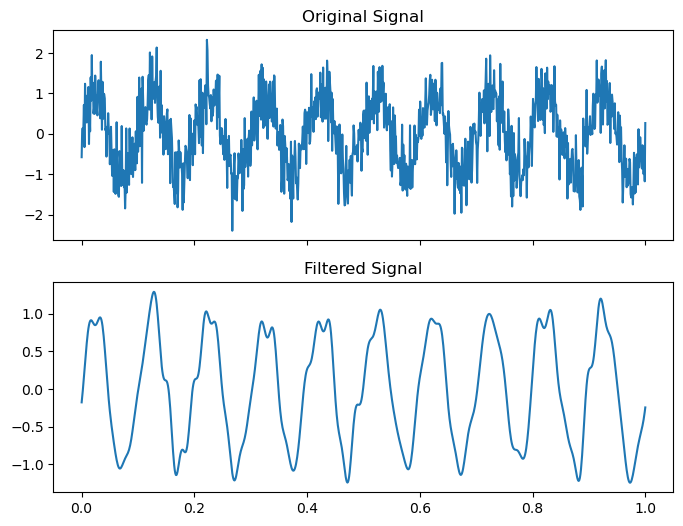

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a noisy signal
t = np.linspace(0, 1, 1000)
x = np.sin(2 * np.pi * 10 * t) + 0.5 * np.random.randn(len(t))

# Compute the DFT of the signal
X = np.fft.fft(x)

# Create a low-pass filter
freqs = np.fft.fftfreq(len(x), t[1]-t[0])
lowpass = np.abs(freqs) < 50

# Apply the low-pass filter to the DFT of the signal
X_filtered = X* lowpass

# Compute the inverse DFT of the filtered signal
x_filtered = np.fft.ifft(X_filtered)

# Plot the original and filtered signals
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(8, 6))

ax0.plot(t, x)
ax0.set(title='Original Signal')

ax1.plot(t, x_filtered.real)
ax1.set(title='Filtered Signal')

plt.show()

**Create a low-pass filter**
```
freqs = np.fft.fftfreq(len(x), t[1] - t[0])
lowpass = np.abs(freqs) < 50
```
The code provided above creates a low-pass filter that can be applied to a signal using the Fast Fourier Transform (FFT). Here is a brief explanation of how it works:

The np.fft.fftfreq function computes the frequencies of the FFT output. It takes two arguments: the length of the input signal (len(x)), and the sampling interval (t[1] - t[0]). The resulting freqs array contains the frequencies corresponding to each element of the FFT output.
The expression np.abs(freqs) < 50 creates a boolean mask that is True for frequencies below 50 Hz (assuming the units of the sampling interval are in seconds). This mask is used to select only the low-frequency components of the FFT output.

To apply the filter to a signal, you can take its FFT using np.fft.fft, multiply it by the lowpass mask, and then take the inverse FFT using np.fft.ifft. This will result in a filtered version of the original signal that contains only the low-frequency components.

**Apply the low-pass filter to the DFT of the signal**

`X_filtered = X * lowpass` 

The code provided above applies the low-pass filter to the Discrete Fourier Transform (DFT) of a signal. Here is a brief explanation of how it works:

X represents the DFT of the signal you want to filter.
lowpass is a boolean mask that selects only the low-frequency components of the DFT (as explained in the previous answer).
The expression X * lowpass multiplies the DFT X element-wise with the lowpass mask, effectively setting to zero all frequency components above the cutoff frequency.
The resulting X_filtered array contains the filtered DFT of the signal, which can be transformed back to the time domain using np.fft.ifft(X_filtered).